<a href="https://colab.research.google.com/github/TeraneAgaeva/Data-Analysis-course-/blob/main/hw4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt # or  import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/yulu_rental.csv

drive/MyDrive/yulu_rental.csv


In [4]:
data_path = 'drive/MyDrive/yulu_rental.csv'
df = pd.read_csv(data_path)

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

1. Визначити залежність кількості велосипедів від погоди, при цьому задати колір залежно від того чи робочий це день.


In [10]:
df_viz = df[['weather', 'count', 'workingday']]
df_viz

,weather,count,workingday
0,1,16,0
1,1,40,0
2,1,32,0
3,1,13,0
4,1,1,0
...,...,...,...
10881,1,336,1
10882,1,241,1
10883,1,168,1
10884,1,129,1


In [18]:
 #df_viz1 = df_viz.groupby(['weather', 'workingday']).sum().reset_index()
 #df_viz1

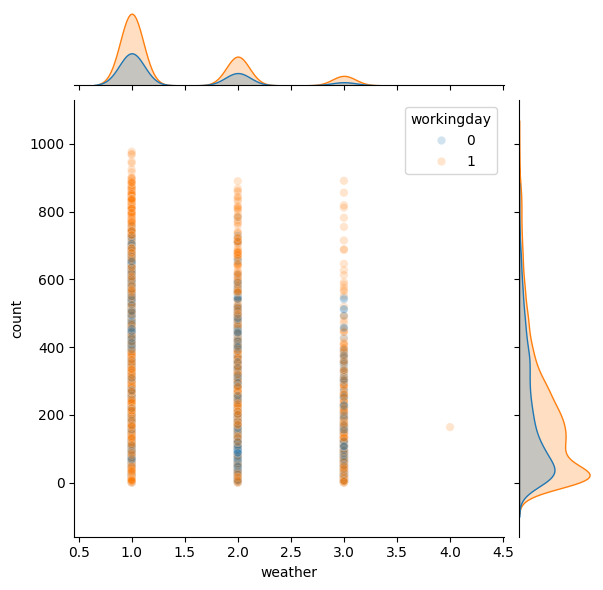

In [19]:
sns.jointplot(data=df_viz, x="weather", y="count", alpha=0.2, hue="workingday");

З графіка можна побачити, що найбільша кількість велосипедів, коли гарна погода і особливо робочі дні. З погіршенням погоди можна побачити, що кількість велосипедів зменьшується і при цьому вже в робочі та вихідні дні кількічть приблизно однакова

2. Відобразити залежність сезону і кількості велосипедів на діаграмі

In [20]:
df_season= df[['season', 'count']]
df_season

,season,count
0,1,16
1,1,40
2,1,32
3,1,13
4,1,1
...,...,...
10881,4,336
10882,4,241
10883,4,168
10884,4,129


In [24]:
df_s1 = df_season.groupby('season').sum().reset_index()
df_s1

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


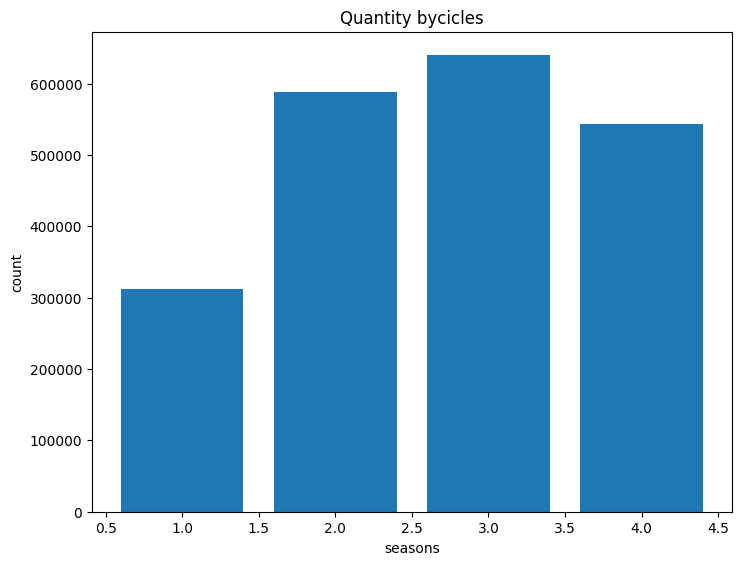

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_s1['season'], df_s1['count'])
# Добавление подписи оси X
ax.set_xlabel('seasons')

# Добавление подписи оси Y
ax.set_ylabel('count')

# Добавление названия диаграммы
ax.set_title('Quantity bycicles')

plt.show()

In [ ]:
Бачимо з діаграми, що найбільше велосипедів орендується восени. Складно зрозуміти чому так. Можливо восени більш приємна погода, при цьому літом та зимою не на багато меньше, а от весною меньше. Можливо весна дуже дощова

In [ ]:
3. До попереднього запиту краще для аналізу брати ще погоду.

In [29]:
df_season2= df[['season', 'count', 'weather']]
df_season2

,season,count,weather
0,1,16,1
1,1,40,1
2,1,32,1
3,1,13,1
4,1,1,1
...,...,...,...
10881,4,336,1
10882,4,241,1
10883,4,168,1
10884,4,129,1


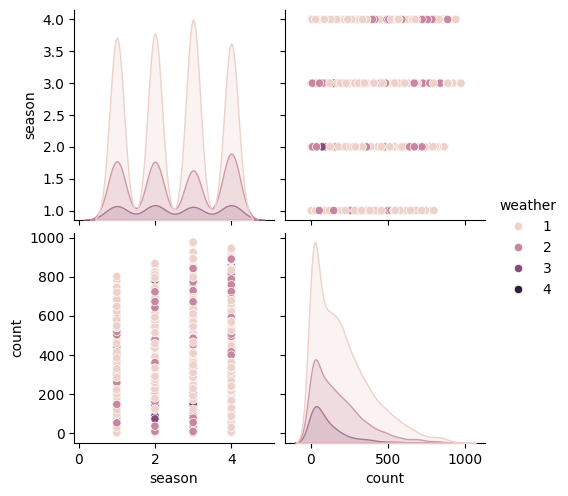

In [30]:
sns.pairplot(df_season2, hue='weather');

In [ ]:
Судячи з графіку дуже поганої погодити протягом року не було, а весною мабуть найприємніша погода то хочеться більше пішки прогулюватись